## 3. K-means Clustering  

### Start by importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import mean
from numpy import std

#Increase plot size
plt.rcParams["figure.figsize"] = (8,5.5)

### Start by loading dataset and removing unncessary values/columns


In [2]:
#Load the normalized csv file containing scalled data

csv_file = "PC1_with_scaled_X_Y.csv"
df = pd.read_csv(csv_file)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()


,x,y,PC1
0,0.0,0.356947,-0.018991
1,0.0,0.357339,-0.014677
2,0.0,0.357730,-0.010282
3,0.0,0.358121,-0.005910
4,0.0,0.358513,-0.001625


In [3]:
df.describe()

,x,y,PC1
count,5.849199e+06,5.849199e+06,5.849199e+06
mean,4.600322e-01,5.126736e-01,2.287508e-16
std,2.448846e-01,2.528056e-01,1.794885e-01
min,0.000000e+00,0.000000e+00,-2.321955e-01
25%,2.538004e-01,3.045010e-01,-1.176868e-01
50%,4.590218e-01,5.201566e-01,-3.820644e-02
75%,6.645737e-01,7.248532e-01,6.098787e-02
max,1.000000e+00,1.000000e+00,1.860217e+00


### Plot the data into a scatter plot to visualize the PC1 values

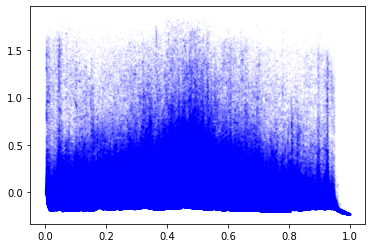

In [4]:
plt.scatter(df['x'], df['PC1'], color='Blue',alpha=0.03, s=1)
plt.show()

### Initially we just try to run k-means with default parameters to check its performance and output. The default variable values used are init: ‘k-means++’ n_init=10 max_iter=300 algorithm =”lloyd”

In [5]:
col_names = ["x","y","PC1"]
kmeans = KMeans(5)
kmeans.fit(df)
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=col_names)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,x,y,PC1
0,0.468322,0.546701,0.309878
1,0.240372,0.780090,-0.059203
2,0.220696,0.314735,-0.029583
3,0.618455,0.221293,-0.078013
4,0.741439,0.692547,-0.042483


In [6]:
ykmeans = kmeans.predict(df)


### Copy the dataframe into a new dataframe and then add the cluster column for each row from the prediction

In [7]:
df_predicted = df[['x','y','PC1']].copy()
df_predicted['Cluster'] = ykmeans
df_predicted

,x,y,PC1,Cluster
0,0.0,0.356947,-0.018991,2
1,0.0,0.357339,-0.014677,2
2,0.0,0.357730,-0.010282,2
3,0.0,0.358121,-0.005910,2
4,0.0,0.358513,-0.001625,2
...,...,...,...,...
5849194,1.0,0.639922,-0.231353,4
5849195,1.0,0.640313,-0.231447,4
5849196,1.0,0.640705,-0.231534,4
5849197,1.0,0.641096,-0.231605,4


### Check how many elements belong to each Cluster

In [8]:
df_predicted.Cluster.value_counts()

4    1295457
1    1263751
3    1238131
2    1209301
0     842559
Name: Cluster, dtype: int64

### Use PCA to visualize the data in 2  dimensions, just try using it for the visualization part, PCA already applied to dataframe to produce PC1 as well. However, now we are using it to represent two axises

c:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


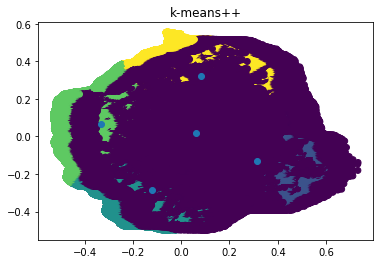

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA (n_components=2)
df2d = pca.fit_transform(df)
centroids_2d = pca.transform(centroids)
plt.title("k-means++")
plt.scatter(x=df2d[:,0], y=df2d[:,1],c=df_predicted['Cluster'])
plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
plt.show()

#### Evaluation: The values are forming clusters, however, the shape of the clusters is not vissible as they are overlapping in the 2D plot. Centroids appear to be situated in the middle, however, this will be more apperant when we plot a 3d visualization. Having a larger scale would have provided a better visualization. 

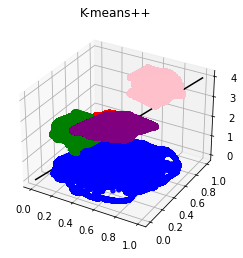

In [10]:
# now we try to plot the data in the 3d manner to better show how the clusters are formed

data0 = df_predicted[df_predicted.Cluster==0]
data1 = df_predicted[df_predicted.Cluster==1]
data2 = df_predicted[df_predicted.Cluster==2]
data3 = df_predicted[df_predicted.Cluster==3]
data4 = df_predicted[df_predicted.Cluster==4]

x_min = df_predicted['x'].min()
y_min = df_predicted['y'].min()
z_min = df_predicted['Cluster'].min()
x_max = df_predicted['x'].max()
y_max = df_predicted['y'].max()
z_max = df_predicted['Cluster'].max()


## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, z_max, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data0.x, data0.y, data0.Cluster, c ='blue', label = 'Cluster 1')
kplot.scatter3D(data1.x, data1.y, data1.Cluster, c ='red', label = 'Cluster 2')
kplot.scatter3D(data2.x,data2.y,data2.Cluster,c ='green', label = 'Cluster 3')
kplot.scatter3D(data3.x,data3.y,data3.Cluster,c ='purple', label = 'Cluster 4')
kplot.scatter3D(data4.x,data4.y,data4.Cluster,c ='pink', label = 'Cluster 5')

plt.title("K-means++")
plt.show()

#### 5 different clusters have been formed. However, using a different scale the cluster placement would have become more apperant. As we can see that pink cluster is hiding the purple cluster below it, despite having different for the axises available. 

# Apply kmeans with random parameter and elkan algorithm

In [11]:
col_names = ["x","y","PC1"]
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300,random_state=42, algorithm="elkan")
kmeans.fit(df)
centroids = kmeans.cluster_centers_
pd.DataFrame(centroids,columns=col_names)

,x,y,PC1
0,0.618188,0.221202,-0.077987
1,0.741570,0.692525,-0.042586
2,0.240307,0.780359,-0.059454
3,0.468183,0.546946,0.309225
4,0.220386,0.314973,-0.029600


In [12]:
ykmeans = kmeans.predict(df)

In [13]:
df_predicted1 = df[['x','y','PC1']].copy()
df_predicted1['Cluster'] = ykmeans
df_predicted1

,x,y,PC1,Cluster
0,0.0,0.356947,-0.018991,4
1,0.0,0.357339,-0.014677,4
2,0.0,0.357730,-0.010282,4
3,0.0,0.358121,-0.005910,4
4,0.0,0.358513,-0.001625,4
...,...,...,...,...
5849194,1.0,0.639922,-0.231353,1
5849195,1.0,0.640313,-0.231447,1
5849196,1.0,0.640705,-0.231534,1
5849197,1.0,0.641096,-0.231605,1


In [14]:
df_predicted1.Cluster.value_counts()

1    1295034
2    1262535
0    1238717
4    1208482
3     844431
Name: Cluster, dtype: int64

c:\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


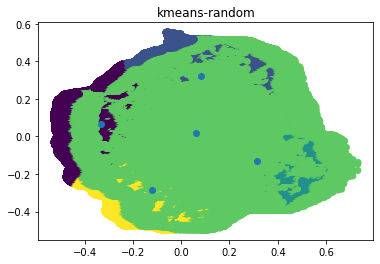

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA (n_components=2)
df2d = pca.fit_transform(df)
centroids_2d = pca.transform(centroids)
plt.title("kmeans-random")
plt.scatter(x=df2d[:,0], y=df2d[:,1],c=df_predicted1['Cluster'])
plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
plt.show()


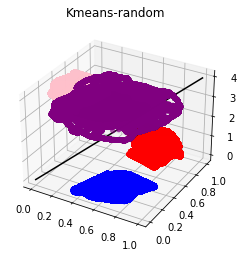

In [16]:
# now we try to plot the data in the 3d manner to better show how the clusters are formed

data0 = df_predicted1[df_predicted1.Cluster==0]
data1 = df_predicted1[df_predicted1.Cluster==1]
data2 = df_predicted1[df_predicted1.Cluster==2]
data3 = df_predicted1[df_predicted1.Cluster==3]
data4 = df_predicted1[df_predicted1.Cluster==4]

x_min = df_predicted1['x'].min()
y_min = df_predicted1['y'].min()
z_min = df_predicted1['Cluster'].min()
x_max = df_predicted1['x'].max()
y_max = df_predicted1['y'].max()
z_max = df_predicted1['Cluster'].max()


## Set the axes
kplot = plt.axes(projection='3d')
xline = np.linspace(x_min, x_max, 10000)
yline = np.linspace(y_min, y_max, 10000)
zline = np.linspace(z_min, z_max, 10000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data0.x, data0.y, data0.Cluster, c ='blue', label = 'Cluster 1')
kplot.scatter3D(data1.x, data1.y, data1.Cluster, c ='red', label = 'Cluster 2')
kplot.scatter3D(data2.x,data2.y,data2.Cluster,c ='green', label = 'Cluster 3')
kplot.scatter3D(data3.x,data3.y,data3.Cluster,c ='purple', label = 'Cluster 4', alpha=0.5)
kplot.scatter3D(data4.x,data4.y,data4.Cluster,c ='pink', label = 'Cluster 5')

plt.title("Kmeans-random")
plt.show()

#### In this representation the green cluster is completly hidden bellow the purple cluster despite being no overlaps.

## To determine optimal value for clusters, use the elbow method by using the relevant values of x,y,PC1


In [17]:

sse = []
for k in range(1,10):
    km = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300,random_state=42, algorithm="elkan")
    #km = KMeans (n_clusters=k)
    km.fit(df[['x','y','PC1']])
    sse.append(km.inertia_)
sse

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


[913031.8978545782,
 633093.2851315126,
 447710.3079731654,
 348417.9701165876,
 267091.6341328576,
 226920.26396110462,
 197042.39930393966,
 176848.69656302166,
 158733.72263164577]

#### During the inital run, when K=1, causes are warning, which we are not concerned with as the purpose it rerun K-mean with k upto 10

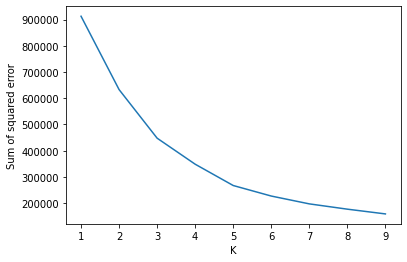

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sse)

### plot shows that at the value of 3 and 5 the shape changes, and afterwards flattens out. We therefore choose to run 5 clusters, hence using k=5 in the model

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels1 = kmeans.labels_
labels2 = km.labels_

print("K-means++/Lyods - Calinski Harabasz score:",metrics.calinski_harabasz_score(df, labels1))
print("K-means++/Lyods - Davies Bouldin score:",metrics.davies_bouldin_score(df, labels1))

print("Random/Elkan - Calinski Harabasz score:",metrics.calinski_harabasz_score(df, labels2))
print("Random/Elkan - Davies Bouldin score:",metrics.davies_bouldin_score(df, labels2))

K-means++/Lyods - Calinski Harabasz score: 3536488.134722486
K-means++/Lyods - Davies Bouldin score: 0.8954893217338153
Random/Elkan - Calinski Harabasz score: 3474422.2145092036
Random/Elkan - Davies Bouldin score: 0.8758236267000094


### High Calinski Harabasz values are supposed to be good, indicating better defined clusters. Lower Davies Boulding score shows better seperation between clusters. Thus leaving indicating use of K-means++ with Lyod algorithm being better for Cluster definitions, however with lover cluster seperation. While using Random with Elkan algorithm is the results in the complete opposite.

In [20]:
#Now we calculate Dunn value 
# We store the clusters
from jqmcvi import base

clus0 = df.loc[df_predicted1.Cluster == 0]
clus1 = df.loc[df_predicted1.Cluster == 1]
clus2 = df.loc[df_predicted1.Cluster == 2]
clus3 = df.loc[df_predicted1.Cluster == 3]
clus4 = df.loc[df_predicted1.Cluster == 4]
cluster_list = [clus0.values, clus1.values, clus2.values, clus3.values, clus4.values ]
 
print(base.dunn(cluster_list))

ModuleNotFoundError: No module named 'jqmcvi'

#### Due to jqmcvi package not being available, we were unable to apply this test. We tried installing git, as installation through pip was not available. However, even direct install using git resulted in errors. After several tries, we gave up the attempt, as the installation and recommended manual troubleshooting changes could have caused python and jupyter notebooks to break. 

kmeans silhouette score is 0.72 when k is 2
kmeans silhouette score is 0.68 when k is 3
kmeans silhouette score is 0.7 when k is 4
kmeans silhouette score is 0.67 when k is 5
kmeans silhouette score is 0.65 when k is 6
kmeans silhouette score is 0.62 when k is 7
kmeans silhouette score is 0.59 when k is 8
kmeans silhouette score is 0.51 when k is 9


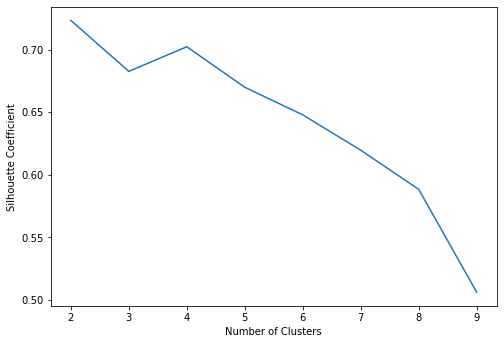

In [ ]:
range_start = 2
range_finish = 10
range_step = 1
for k in range(range_start, range_finish, range_step):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300,random_state=42,algorithm="elkan")
#   kmeans = KMeans(init="k-means++", n_clusters=k, n_init=10, max_iter=300,random_state=42)
    kmeans.fit(df.iloc[0:50000, 0:3])
    # Compute the silhouette scores for each run and round off to two digits 
    kmeans_silhouette = silhouette_score(df.iloc[0:50000, 0:3], kmeans.labels_).round(2)
    print("kmeans silhouette score is", kmeans_silhouette, "when k is", k)

# Create a list to hold the silhouette coefficients for each k
silhouette_coefficients = []
for k in range(range_start, range_finish):
    kmeans = KMeans(init="random", n_clusters=k, n_init=10, max_iter=300,random_state=42)
    kmeans.fit(df.iloc[0:50000, 0:3])
    score = silhouette_score(df.iloc[0:50000, 0:3], kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(range_start, range_finish), silhouette_coefficients)
plt.xticks(range(range_start, range_finish))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### We found the silhouette score calculation being very memory intensive, even for a single run, it did not complete when left over night (using 8-9 hours). It would have been optimal if these values could have been calculated, as the elbow method is not that correct and using both methods a better estimation of required k value (clusters) could have been estimated. As an attempt to see if the calculation is working we tried reducing the values to 50,000, which is 1% of the actual dataset. Hence the calculated silhoutte score is not true representative of the dataset. 